# MRO: Laboratorium 3 - KNN
# Piotr Rząsa

Ćwiczenie na podstawie przygotowanej prezentacji: <br>
https://github.com/tmkkopec/knn

## 1) Odtwarzanie obrazów przy pomocy KNN

**Komentarz do wyników uzyskanych poniżej:** <br>
Poniżej zaprezentowałem 3 zbiory wynikowe, każdy dla innego romiaru zbioru treningowego. <br>
Dzięki zastosowaniu obrazka z napisem oraz tłem z dużą ilością szczegółów byłem w stanie dość dobrze porównać wyniki i dojść do ciekawych wniosków. <br>
Każdy zbiór zawiera przykładowy wynik dla jednej z instancji testowych dla k=1,3,10 orz obrazek uśredniony dla podanych 'k'. Dalej są obok siebie oryginalne zdjęcie i uśrednienie dla wszystkich 5 prób (w teorii najlepszy z obrazków).<br><br>
Obserwując wyniki można zauważyć, że samodzielny wynik dla pojedynczego K dawał zazwyczaj albo nieostry, albo bardzo "zaszumiony" obraz - wiele wyróżniających się pikseli nie pasujących do otoczenia. <br>
Natomiast uśrednienie dla 3 różnych k pozwalało na uzyskanie dużo lepszego wyniku - o wiele bardziej zbliżonego do oryginału. <br>
Zebranie średniego obrazka z 5 prób dawało natomiast obrazek zupełnie pozbawiony szumów i delikatnie rozmyty, pozbawiony ostrych krawędzi. Być może nie zawsze był on czytelniejszy od oryginału, ale w pewnym sensie uważam że "przyjemniejszy" dla oka i zdecydowanie najlepszy. <br><br>
Pozwala to dojść do wniosku, że dopiero wzięcie pod uwagę kilku różnych wyników z różnymi parametrami pozwala na uzyskanie satysfakcjonującego wyniku - usuwa to wszelkie punktowe niedoskonałości, poprzez umniejszanie ich roli w czasie uśredniania.

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import imread
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#wczytanie obrazka
img = plt.imread('plate.jpg')
img.shape

(200, 200, 3)

In [4]:
def getImg(TRAIN_SIZE, K_NUMBER):

    height, width = img.shape[:2]
    X = np.array(list(chain.from_iterable(
        [[(i, j) for j in range(width)] for i in range(height)]
    )))
    y = list(chain.from_iterable(img))
    
    # podzielenie na część testową i treningową
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, test_size=1-TRAIN_SIZE)

    # przygotowanie zdjęcia "treningowego"
    img_without_X_test = np.copy(img)
    for i, j in X_test:
        img_without_X_test[i, j] = [255, 255, 255]

    # klasyfikacja
    classifier = KNeighborsClassifier(n_neighbors=K_NUMBER)
    classifier.fit(X_train, y_train)
    neighbours_array = classifier.kneighbors(X_test, return_distance=False)

    
    pixel_colors = np.array([
        np.mean([y_train[neighbour_index] for neighbour_index in neighbours], axis=0) for neighbours in neighbours_array
    ])

    new_img = np.copy(img)
    for (i, j), color in zip(X_test, pixel_colors):
        new_img[i, j] = color
    
    return new_img

In [5]:
def compare_different_K(TRAIN_SIZE, show):
    
    img1 = getImg(TRAIN_SIZE, 1)
    img3 = getImg(TRAIN_SIZE, 3)
    img10 = getImg(TRAIN_SIZE, 10)

    ## średnia z 3 zdjęć
    result = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                result[i,j,k] = np.mean([img1[i,j,k], img3[i,j,k], img10[i,j,k]])
  

    if(show==True):
        plt.figure(figsize=(16, 16))

        plt.subplot(2,2,1)
        plt.title("Zbiór treningowy={}, liczba sąsiadów={}".format(TRAIN_SIZE, 1))
        plt.imshow(img1)

        plt.subplot(2,2,2)
        plt.title("Zbiór treningowy={}, liczba sąsiadów={}".format(TRAIN_SIZE, 3))
        plt.imshow(img3)

        plt.subplot(2,2,3)
        plt.title("Zbiór treningowy={}, liczba sąsiadów={}".format(TRAIN_SIZE, 10))
        plt.imshow(img10)
        
        plt.subplot(2,2,4)
        plt.title("Średnia z poprzednich 3 zdjęć")
        plt.imshow(result)

        plt.show()
    
    return result


In [44]:
def get_complex_solution(TRAIN_SIZE):
    print("Rozwiązanie dla zbioru treningowego = {}".format(TRAIN_SIZE))
    result1 = compare_different_K(TRAIN_SIZE, True)
    result2 = compare_different_K(TRAIN_SIZE, False)
    result3 = compare_different_K(TRAIN_SIZE, False)
    result4 = compare_different_K(TRAIN_SIZE, False)
    result5 = compare_different_K(TRAIN_SIZE, False)

    result = np.copy(img)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            for k in range(result.shape[2]):
                result[i,j,k] = np.mean([result1[i,j,k], result2[i,j,k], result3[i,j,k], result4[i,j,k], result5[i,j,k]])

    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    plt.title("Zdjęcie oryginalne")
    plt.imshow(img)

    plt.subplot(1,2,2)
    plt.title("Średnie zdjęcie dla 5 uśrednionych prób")
    plt.imshow(result)

    plt.show()

Rozwiązanie dla zbioru treningowego = 0.1


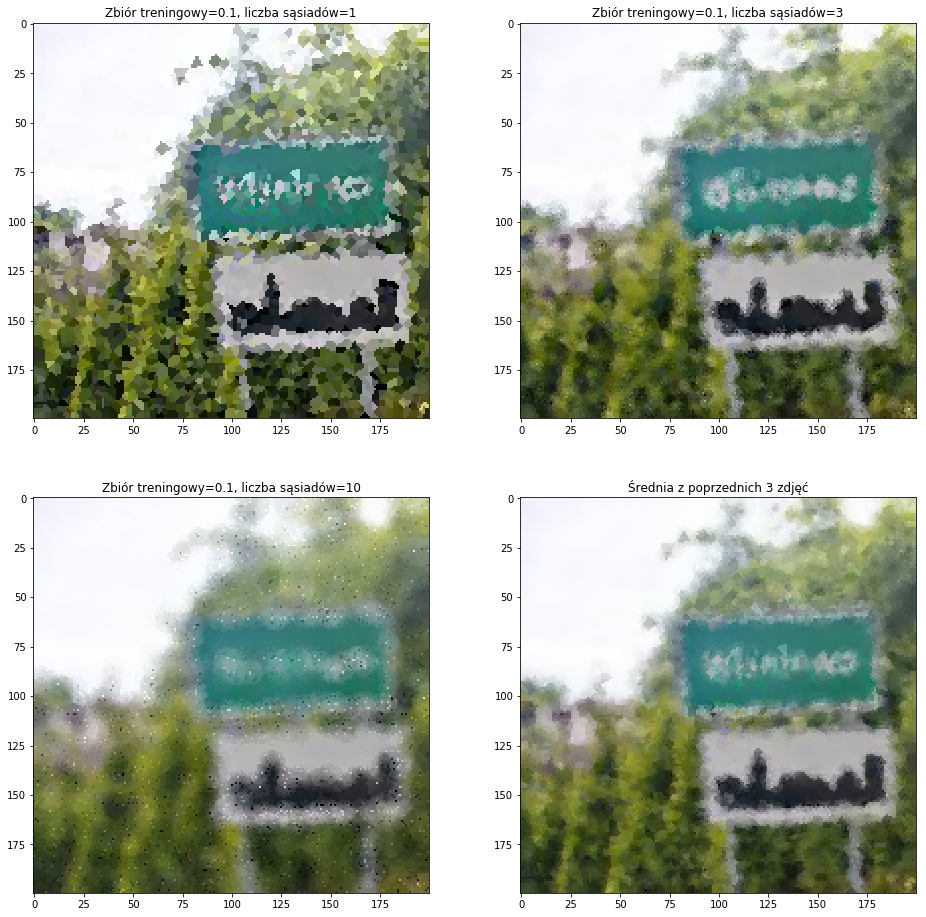

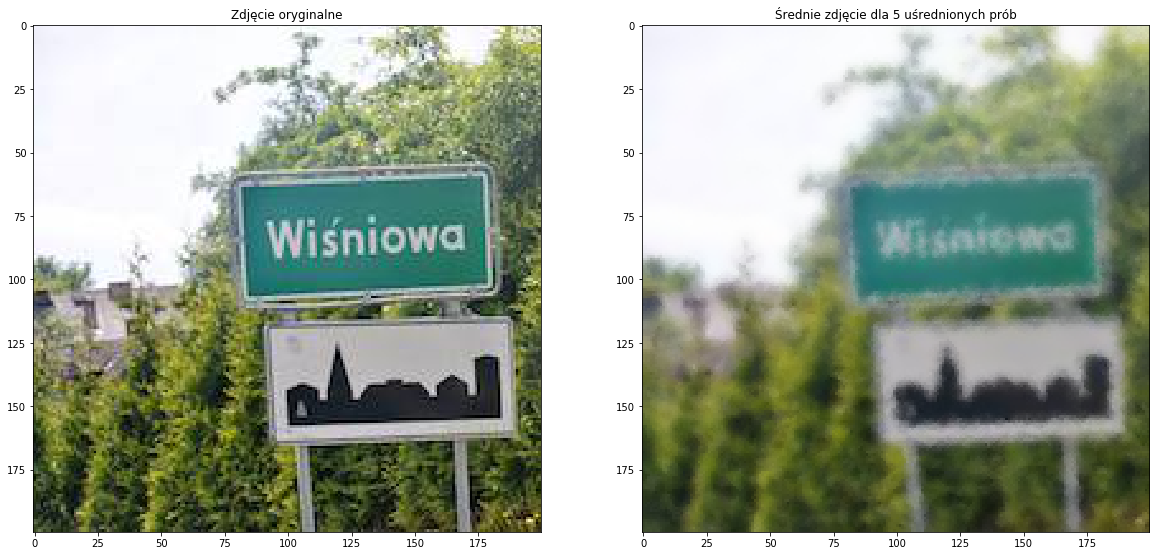

In [45]:
get_complex_solution(0.1)

Rozwiązanie dla zbioru treningowego = 0.5


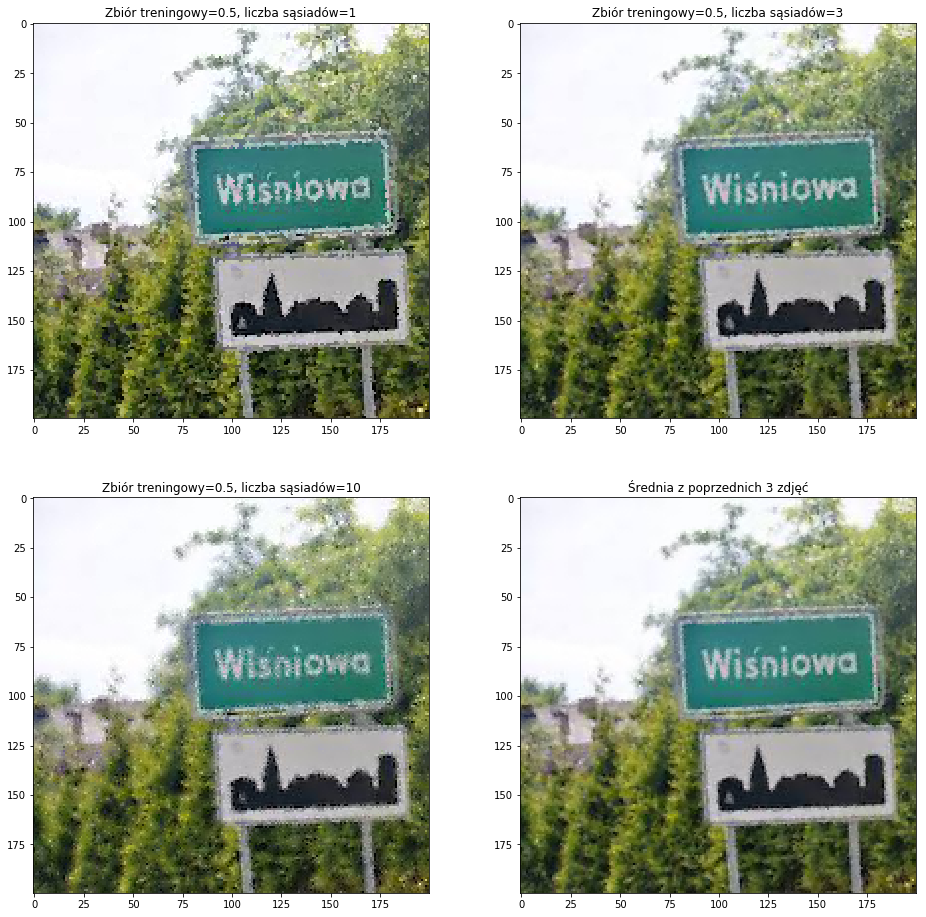

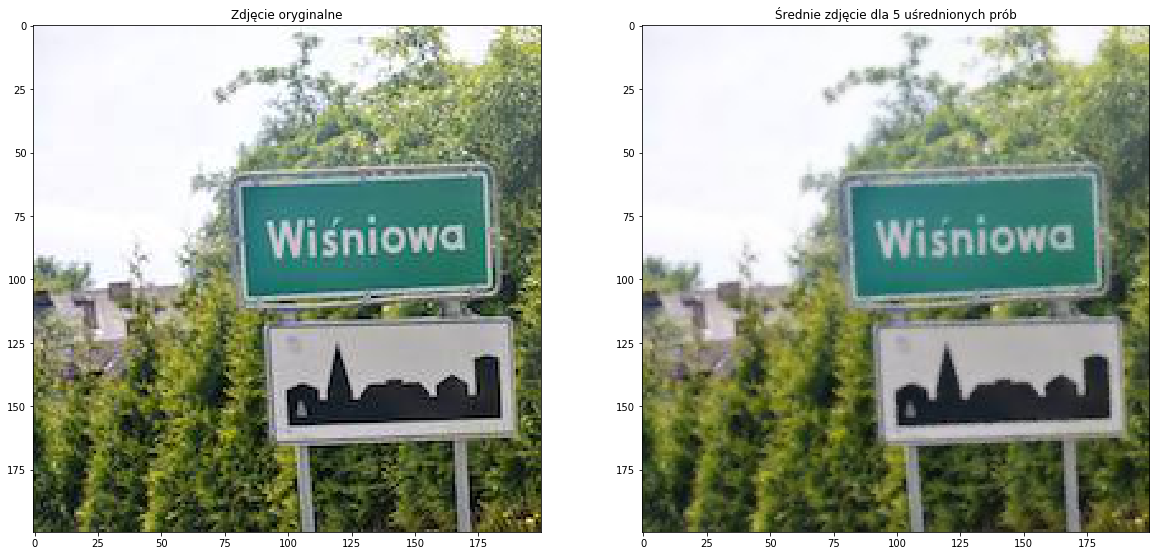

In [46]:
get_complex_solution(0.5)

Rozwiązanie dla zbioru treningowego = 0.75


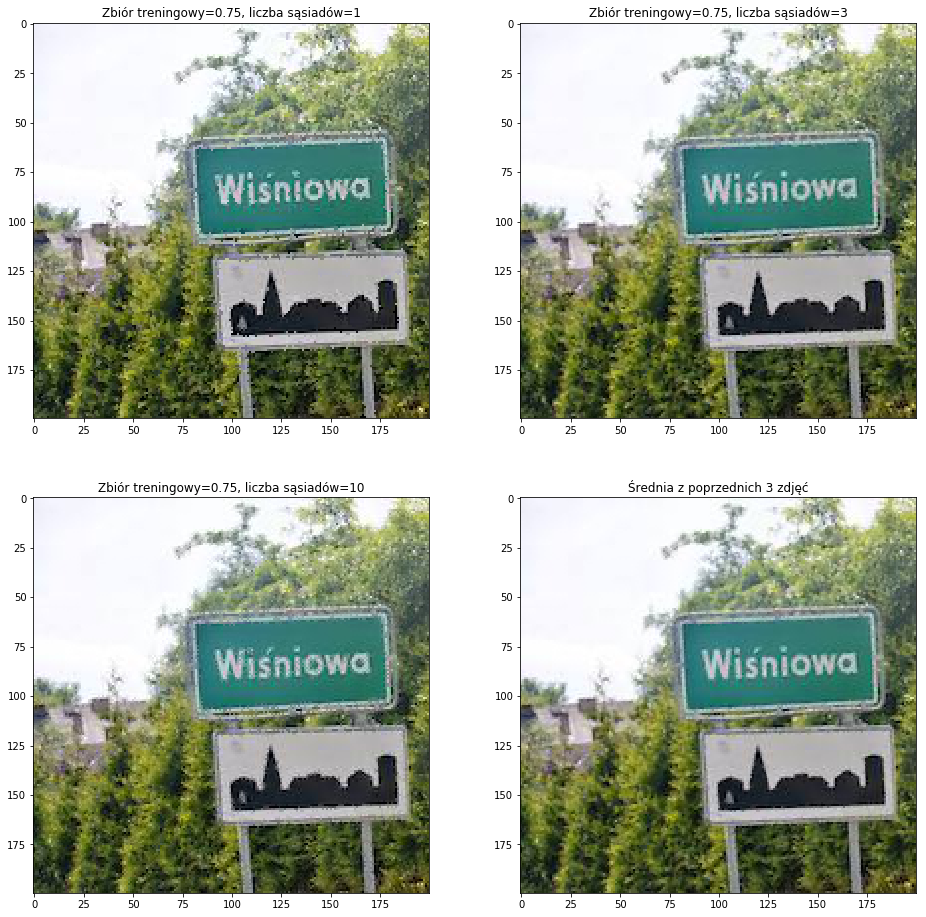

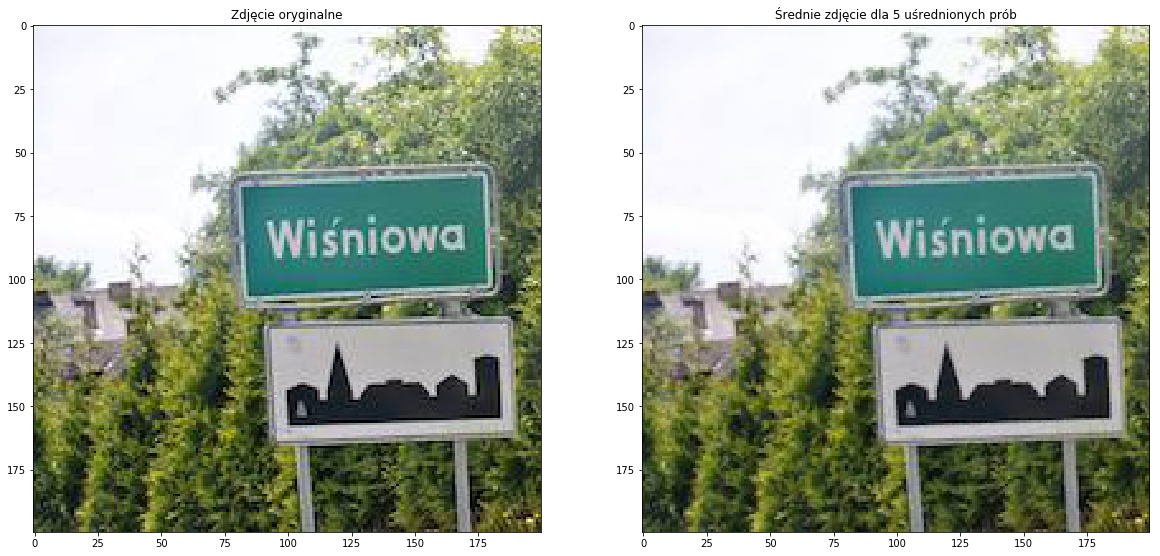

In [47]:
get_complex_solution(0.75)

## 2) Klasyfikacja danych przy użyciu PCA
**Poniżej parametry generowanych danych:**

In [22]:
NUMBER = 100
WYMIAR = 10
L_KLAS = 2
ZABURZENIE = 5

In [23]:
# mu_vec - współrzędne wokół których powinny się rozmieścić punkty
# cov_mat - jak bardzo powinny być rozrzucone względem każdego wymiaru po kolei

for i in range(L_KLAS):
    
    mu_vec2 = np.ones((WYMIAR,), dtype=np.int)
    mu_vec2 = np.multiply(mu_vec2, i*2)
    #print(mu_vec2)
    
    cov_mat2 = np.zeros((WYMIAR, WYMIAR), int)
    np.fill_diagonal(cov_mat2, 1)
    zabu = np.random.randint(ZABURZENIE, size=(WYMIAR, 1))
    cov_mat2 = np.multiply(cov_mat2, np.add(zabu,1))
    #print(cov_mat2)
    
    class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, NUMBER).T
    assert class2_sample.shape == (WYMIAR,NUMBER), "The matrix has not the right dimensions"

    # konkatenacja danych
    if(i == 0):
        all_samples = class2_sample
    else:
        all_samples = np.concatenate((all_samples, class2_sample), axis=1)

y = np.append(np.zeros((NUMBER,), dtype=np.int), 
              np.ones((NUMBER,), dtype=np.int))

all_samples.shape
assert all_samples.shape == (WYMIAR,NUMBER*L_KLAS), "The output matrix has not the right dimensions"

#### Wizualizacja wygenerowanych danych przy pomocy PCA:

In [48]:
sklearn_pca = PCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
#print(sklearn_transf.shape)
#print(sklearn_transf)

plt.figure(figsize=(7, 7))

plt.plot(sklearn_transf[0:NUMBER,0], sklearn_transf[0:NUMBER,1], 
         'o', markersize=7, color='blue', alpha=0.5, label='class 1')
plt.plot(sklearn_transf[NUMBER:NUMBER*2,0], sklearn_transf[NUMBER:NUMBER*2,1], 
         '^', markersize=7, color='red', alpha=0.5, label='class 2')

plt.xlabel('pca_y')
plt.ylabel('pca_x')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.title('PCA transformation')

Text(0.5,1,'PCA transformation')

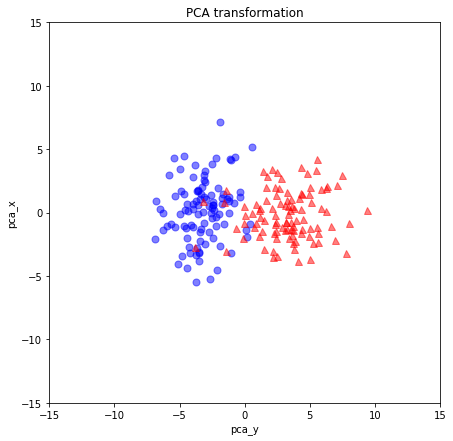

In [49]:
plt.show()

#### Uśrednione wyniki dla poniższych rozmiarów zbiorów uczących, dla 10 prób i różnych warości K

In [28]:
# rozmiary zbiorów uczących
train_sizes = [0.05, 0.25, 0.75]

In [29]:
# funkcja licząca wyniki dla poszczególnych kerneli

def compute_for_k(K_NUMBER):
    X = 10
    print('>>>Obliczenia dla K = %s <<<\n' % K_NUMBER)
    for size in train_sizes:
        print('Wyniki 10 prób dla rozmiaru zbioru uczącego %0.2f:' % size)
        sum_score = 0
        sum_err = 0
        for i in range(X):
            X_train, X_test, y_train, y_test = train_test_split(all_samples.T, y, train_size=size, test_size=1-size)

            model = KNeighborsClassifier(n_neighbors=K_NUMBER)
            model.fit(X_train, y_train)

            score = model.score(X_test, y_test)
            modelPred = model.predict(X_test)
            meanSquaredError=mean_squared_error(y_test, modelPred)
            
            #print('\tAccuracy: %0.5f (%0.5f)' %(score, meanSquaredError))
            sum_score += score
            sum_err += meanSquaredError
            
        mean_score = sum_score / X
        mean_err = sum_err / X
        print('\tŚrednia dokładność: %0.5f \n\tBłąd śreniokwadratowy: (%0.5f)' %(mean_score, mean_err))

In [34]:
compute_for_k(1)

>>>Obliczenia dla K = 1 <<<

Wyniki 10 prób dla rozmiaru zbioru uczącego 0.05:
	Średnia dokładność: 0.88263 
	Błąd śreniokwadratowy: (0.11737)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.25:
	Średnia dokładność: 0.91333 
	Błąd śreniokwadratowy: (0.08667)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.75:
	Średnia dokładność: 0.92200 
	Błąd śreniokwadratowy: (0.07800)


In [35]:
compute_for_k(3)

>>>Obliczenia dla K = 3 <<<

Wyniki 10 prób dla rozmiaru zbioru uczącego 0.05:
	Średnia dokładność: 0.85632 
	Błąd śreniokwadratowy: (0.14368)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.25:
	Średnia dokładność: 0.92733 
	Błąd śreniokwadratowy: (0.07267)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.75:
	Średnia dokładność: 0.96000 
	Błąd śreniokwadratowy: (0.04000)


In [36]:
compute_for_k(5)

>>>Obliczenia dla K = 5 <<<

Wyniki 10 prób dla rozmiaru zbioru uczącego 0.05:
	Średnia dokładność: 0.76053 
	Błąd śreniokwadratowy: (0.23947)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.25:
	Średnia dokładność: 0.93133 
	Błąd śreniokwadratowy: (0.06867)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.75:
	Średnia dokładność: 0.94600 
	Błąd śreniokwadratowy: (0.05400)


In [37]:
compute_for_k(10)

>>>Obliczenia dla K = 10 <<<

Wyniki 10 prób dla rozmiaru zbioru uczącego 0.05:
	Średnia dokładność: 0.49526 
	Błąd śreniokwadratowy: (0.50474)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.25:
	Średnia dokładność: 0.86667 
	Błąd śreniokwadratowy: (0.13333)
Wyniki 10 prób dla rozmiaru zbioru uczącego 0.75:
	Średnia dokładność: 0.95200 
	Błąd śreniokwadratowy: (0.04800)


In [20]:
def showPCA(K_NUMBER, size): 
    print('Scores for kernel %s with train data size %0.2f:' % (K_NUMBER, size))

    X_train, X_test, y_train, y_test = train_test_split(all_samples.T, y, train_size=size, test_size=1-size)

    model = KNeighborsClassifier(n_neighbors=K_NUMBER)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    modelPred = model.predict(all_samples.T)
    #print(modelPred)
    meanSquaredError=mean_squared_error(y, modelPred)
    print('\tAccuracy: %0.5f (%0.5f)' %(score, meanSquaredError)) 

    sklearn_pca = PCA(n_components=2)
    sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

    plt.figure(1, figsize=(15, 5))

    plt.subplot(1,3,1)
    for i in range(y.size):
        if y[i] == 0:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], 'o', markersize=6, color='blue', alpha=0.5)
        else:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], '^', markersize=6, color='red', alpha=0.5)

    plt.xlim([-15,15])
    plt.ylim([-15,15])
    plt.title('Input Data Classification')


    plt.subplot(1,3,2)
    for i in range(modelPred.size):
        if modelPred[i] != y[i]:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], '*', markersize=10, color='green', alpha=0.5)
        if modelPred[i] == 0:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], 'o', markersize=6, color='blue', alpha=0.5)
        else:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], '^', markersize=6, color='red', alpha=0.5)

    plt.xlim([-15,15])
    plt.ylim([-15,15])
    plt.title('Output Data Classification')


    plt.subplot(1,3,3)
    for i in range(modelPred.size):
        if modelPred[i] != y[i]:
            plt.plot(sklearn_transf[i,0], sklearn_transf[i,1], '*', markersize=10, color='green', alpha=0.5)
    plt.xlim([-15,15])
    plt.ylim([-15,15])
    plt.title('Bad Points Classification')


    plt.show()

### Wizualizacja dla wybranego k = 5

Scores for kernel 1 with train data size 0.05:
	Accuracy: 0.82632 (0.16500)


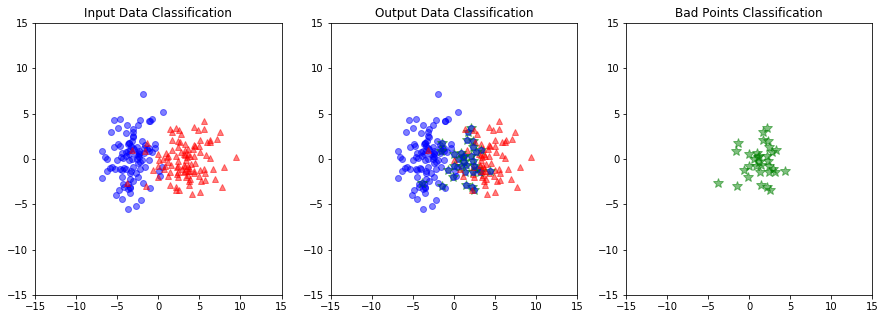

Scores for kernel 5 with train data size 0.75:
	Accuracy: 0.92000 (0.05000)


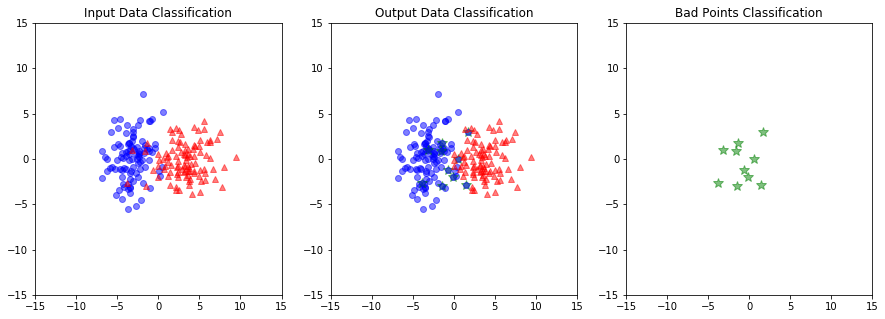

In [38]:
showPCA(1, 0.05)
showPCA(5, 0.75)

**Wnioski:**
Najlepsze wyniki średnie dla dużego zbioru uczącego otrzymaliśmy dla k = 10. <br>
Jednak dla danych testowych o rozmiarze 1/4 osiągnęło k = 5. <br>
Patrząc po początkowej wizualizacji widzimy, że dane jedynie delikatnie na siebie zachodzą, co powoduje, że niewiele punktów jest otoczonych punktami z innej klasy. To nasuwa na myśl, że nie powinniśmy brać zbyt małego k, bo źle sklasyfikujemy punkty przyblizone do klasy przeciwnej (gorsze wyniki dla k=1, 3), ale zbyt duże też nie jest wskazane bo zbytnio zgeneralizują wynik.<br>
Logicznym jest też, dlaczego mały zbiór uczący dawał lepsze wyniki dla mniejszego 'k' - działo się tak dlatego, że  było o wiele mniej punktów niż normalnie, co powodowało że dość daleko przesuwała się granica między klasami jeśli punktów z danej klasy wylosowało się mniej, lub były one wylosowane z obszaru bardziej oddalonego od osi tych dwóch klas.<br>


Jeśli spojrzeć na wynikowe PCA i jak zostały zaklasyfikowane różne punkty, można zauważyć, że błędnie klasyfikowaliśmy tylko te dane, które wyraźnie "wcinały się" w klasę przeciwną i rzeczywiście nie było możliwości prostego ich odróżnienia.
